In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('udemytest.csv')
df2 = pd.read_csv('train.csv')

In [9]:
df.head()


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [11]:
df2.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [13]:

df2= df2[~(df2['x'].notna() & df2['y'].isna())]





In [15]:
print(len(df2['x']), len(df2['y']))

699 699


In [17]:
df2.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


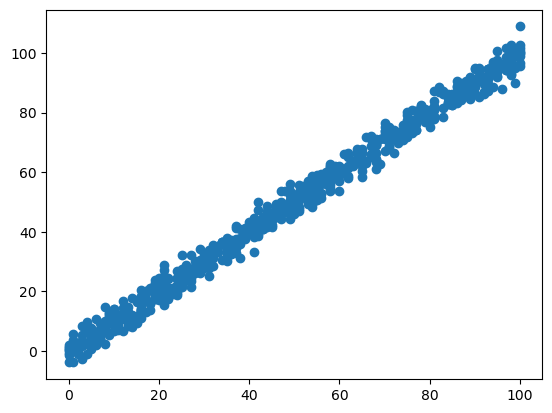

In [124]:
plt.scatter(df2['x'],df2['y'])





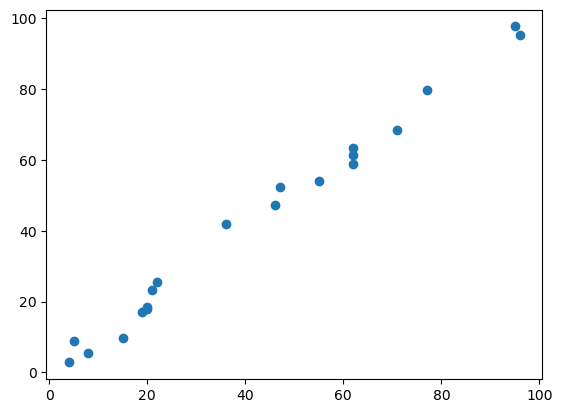

In [19]:
plt.scatter(df['x'],df['y'])





In [21]:
df.corr()

,x,y
x,1.000000,0.994848
y,0.994848,1.000000


In [23]:
df2.corr()

,x,y
x,1.00000,0.99534
y,0.99534,1.00000


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


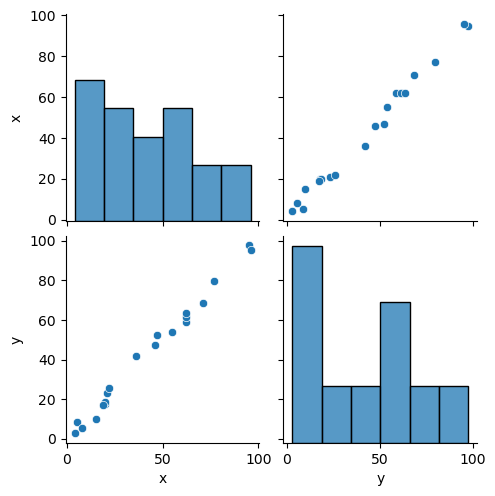

In [25]:
sns.pairplot(df)

In [41]:
X = df[['x']]
Y = df[['y']]

In [43]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state = 42)

In [51]:
X_train.shape

(15, 1)

In [55]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train)

In [63]:
#now we will apply the linear regression 
from sklearn.linear_model import LinearRegression

In [67]:
regression = LinearRegression()

In [69]:
regression.fit(X_train,Y_train)

LinearRegression()

In [71]:
print ("coefficient or slope",regression.coef_) # slope means when x increse 1 unit then y will increase 1.0159
print("intercept",regression.intercept_)  #intercept is value of y when x is 0

coefficient or slope [[1.01596566]]
intercept [-0.21744894]


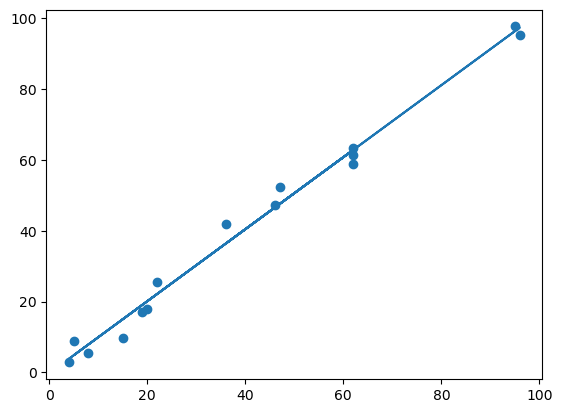

In [75]:
#for plotting best fit line
plt.scatter (X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [87]:
#Prediction = intercept + coeff(y)
Y_pred = regression.predict (X_test)

In [93]:
#performance check 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(score)


4.817341831583068
2.093936239735258
2.19484437525376
0.9918580074675569


In [113]:
#prediction for new data
regression.predict ([[99]])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[100.36315101]])